### Hector Daniel Juarez Leonel
# t-SNE (t-Distributed Stochastic Neighbor Embedding)

Este es un algoritmo de visualización de datos en dimensiones grandes, el algoritmo original fue creado por Sam Roweis y Geoffrey Hinton. La variante propuesta por Laurens van der Maaten utiliza una distribución t (de estudiante).
Esto es muy útil, pues no es posible representar algo más alla de la tercera dimensión y muchos datos con los que se llega a trabajar tienen más de 3 caracteristicas.
Este algoritmo cae dentro de la categoria de manifold learning, los cuales buscan describir un espacio de alta dimension dentro de espacios de baja dimensión. 

Los pasos que sigue SNE son los siguientes:
<ul>
    <li>Primero, convierte las distancias entre puntos en dimensiones altas a probabilidades condicionales. Digamos que tenemos dos puntos, xi y xj in un espacio de alta dimensión y queremos determinar la probabilidad ($p_{i|j}$) de que xj sera seleccionado como un vecino de xi. Para definir esta probabilidad, se usa una curva Gaussiana, y se observa que la probabilidad es alta para puntos cercanos, mientras que es baja para puntos distantes.</li>
    <li>Ahora, se busca determinar el ancho de la curva Gaussiana puesto que esta controla el ratio de probabilidad de seleccion. Una curva amplia sugiere que muchos puntos estaran bastante lejos, mientras que una curva estrecha sugiere que los puntos estan muy compactados.</li>
    <li>Una vez que se proyectan los datos dentro del dimensión de baja dimensión, se puede determinar la correspondiente probabilidad ($q_{i|j}$) entre los correspondientes datos en la dimensión baja, yi y yj</li>
    <li>Lo que busca SNE es posicionar los datos en la dimensión baja para minimizar las diferencias entre $p_{i|j}$ y $q_{i|j}$ sobre todos los puntos usando una función de coste C conocida como la divergencia Kullback-Leibler
    $$C=\sum_{i}\sum_{j}{p_{i|j}\log{\frac{p_{i|j}}{q_{i|j}}}}$$
    </li>
    
    
</ul>

La distribución gaussiana mapea los datos dentro de la dimensión baja, para esto, SNE usa un proceso de gradiente descendiente para minimizar C usando los parametros comunes de las redes neuronales como el ratio de aprendizaje y número de epocas. Además, SNE implementa un término adicional en el proceso de entrenamiento llamado perplejidad.

### Perplejidad (perplexity)
La perplejidad es una seleccion del número efectivo de vecinos usados en la comparacion y es relativamente estable para valores de perplejidad entre 5 y 50. En la práctica, un proceso de prueba y error usando valores de perplejidad dentro de este rango es lo recomendable.

Aunque SNE provee una forma efectiva de visualizar datos de altas dimensiones en un espacio de dimensión baja, aun sufre de un problema conocido como el problema de multitud (the crowding problem). Este problema puede ocurrir si hay puntos posicionados aproximadamente equidistantes dentro de una region alrededor de un punto i. Cuando estos puntos son visualizados en el espacio de baja dimensión, estos se aglutinan entre ellos, dificultando su visualizacion. El problema se intensifica si se intentan poner más espacio entre estos puntos aglutinados, porque otros puntos cualquiera que esten lejos serán entonces ubicados aun más lejos dentro del espacio de dimensión baja.

### t-Distributed SNE
t-SNE busca corregir el problema de multitud usando una version modificada de la funcion de coste (divergencia KL) y sustituye la distribución Gaussiana con la distribución t de estudiante. Esta distribución es una distribución continua que es usada cuando se tiene una pequeña muestra del universo que se está estudiando y se desconoce la desviación estandar. Tambien es conocida como la prueba T de estudiante.


## Implementación
la libreria de sklearn ya tiene una implementación de TSNE y a continuación se muestra un ejemplo de como se ocupa

In [1]:
#Importación de librerias, como los datos están codificados
#utiliza picle para la carga de estos.
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
#carga el archivo de mnist
with open('../data/mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

In [3]:
#primero aplica pca a los datos
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit_transform(mnist['images'].reshape((-1, 28 ** 2)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.066s...
[t-SNE] Computed neighbors for 10000 samples in 4.720s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 275.526782
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.302788
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704

KeyboardInterrupt: 

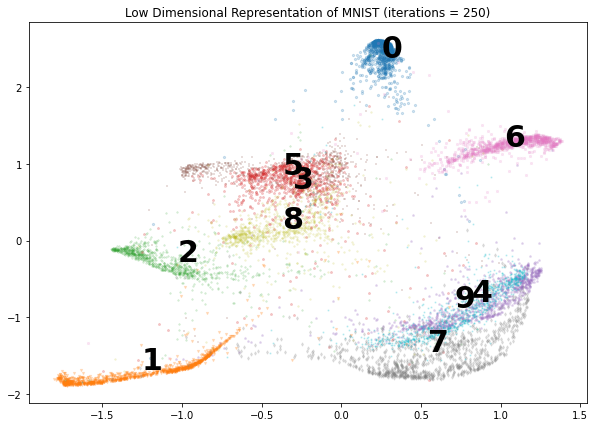

In [4]:
#Asigna una letra a cada una de las i-etiquetas
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
#en este for se realiza el "entrenamiento" de TSNE
#el for solo es para hacer el mismo código 3 veces con distintos
#parametros en la creación del modelo de TSNE
#De esta manera, al graficar se muestra como difieren los resultados
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    mnist_tsne = model_tsne.fit_transform(mnist_pca)

    print('imprimiendo formas')
    print(mnist_tsne.shape)
    print(mnist['labels'].shape)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of MNIST (iterations = {iterations})');
    for i in range(10):
        selections = mnist_tsne[mnist['labels'] == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})    


En los plots se puede ver que en un principio los puntos están muy densos unos de otros, y poco a poco se dispersan pero manteniendo sus vecindarios.

# Conclusión
Esta técnica la encontré hace bastantes años cuando comenzaba a aprender de redes neuronales y deseaba saber como visualizar los datos de dimensiones altas, en su momento, no entendia que realizaba pues aun no entendia bien el concepto de las redes neuronales, ahora al volverlo a leer me quedó muy claro el funcionamiento, en especial al ya haber hecho el ejercicio de DBSCAN pues veo que tiene similitudes a este, solo que en vez de usar como métrica la distancia euclidiana utiliza probabilidades condicionales.

Me parece una técnica muy útil pues en caso de no tener los resultados deseados ocupando algún otro algoritmo, al aplicar TSNE podemos visualizar los datos y ver si es posible separarlos o tal vez como sucede con el ejemplo con las etiquetas 4 y 9, pueden ser datos solapados que sin otro tipo de preprocesamiento, serán imposibles de separar.